In [1]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz as sv


sys.path.append(os.path.abspath("../src"))
from utils import ktic_pull_data, ktic_treat_data_types, ktic_get_title, ktic_get_title_group

warnings.filterwarnings("ignore")

c:\pessoal\kaggle-titanic\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Pulling data from Kaggle's Titanic Competition
- You can find the data [here](https://www.kaggle.com/competitions/titanic/data)

In [2]:
data_folder = ktic_pull_data()

100%|██████████| 34.1k/34.1k [00:00<?, ?B/s]


Unzipping files...
Files unzipped successfully.
['gender_submission.csv', 'test.csv', 'train.csv']


## Basic Dataset Observations

In [3]:
df_train = pd.read_csv(f"{data_folder}/train.csv")
df_test = pd.read_csv(f"{data_folder}/test.csv")
df = pd.concat([df_train, df_test])

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

# Pclass should be categorical as 1st, 2nd and 3rd class
# Age should be integer
# SibSp -> Siblings / Spouses
# Parch -> Parents / Children

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [7]:
df.describe(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


## Treating data types

In [8]:
df = ktic_treat_data_types(df)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    Int64  
 2   Pclass       1309 non-null   object 
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   Int64  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: Int64(2), float64(1), int64(3), object(6)
memory usage: 135.5+ KB


In [10]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,1309.000000,891.0,1046.0,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,29.870937,0.498854,0.385027,33.295479
std,378.020061,0.486592,14.411571,1.041658,0.865560,51.758668
min,1.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,328.000000,0.0,21.0,0.000000,0.000000,7.895800
50%,655.000000,0.0,28.0,0.000000,0.000000,14.454200
75%,982.000000,1.0,39.0,1.000000,0.000000,31.275000
max,1309.000000,1.0,80.0,8.000000,9.000000,512.329200


In [11]:
df.describe(include=["object"])

,Pclass,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,1309,295,1307
unique,3,1307,2,929,186,3
top,3rd,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S
freq,709,2,843,11,6,914


In [12]:
pd_describe = df.describe()
pd_var = df.var(numeric_only=True).to_frame().T.rename(index={0: "var"})
describe_with_var = pd.concat([pd_describe, pd_var], axis=0)

In [13]:
describe_with_var

,PassengerId,Survived,Age,SibSp,Parch,Fare
count,1309.0,891.0,1046.0,1309.0,1309.0,1308.0
mean,655.0,0.383838,29.870937,0.498854,0.385027,33.295479
std,378.020061,0.486592,14.411571,1.041658,0.86556,51.758668
min,1.0,0.0,0.0,0.0,0.0,0.0
25%,328.0,0.0,21.0,0.0,0.0,7.8958
50%,655.0,0.0,28.0,0.0,0.0,14.4542
75%,982.0,1.0,39.0,1.0,0.0,31.275
max,1309.0,1.0,80.0,8.0,9.0,512.3292
var,142899.166667,0.236772,207.693375,1.085052,0.749195,2678.959738


## Adding title column

In [14]:

titles = filter(lambda x: "." in x, df["Name"].str.split(" ", expand=True)[1].sort_values().unique())

list_titles = []
for i in titles:
    list_titles.append(i)

print(list_titles)

df["Title"] = df["Name"].apply(lambda x: ktic_get_title(x, list_titles))
df_train["Title"] = df_train["Name"].apply(lambda x: ktic_get_title(x, list_titles))
df_test["Title"] = df_test["Name"].apply(lambda x: ktic_get_title(x, list_titles))

df = ktic_get_title_group(df)
df_train = ktic_get_title_group(df_train)
df_test = ktic_get_title_group(df_test)

['Capt.', 'Col.', 'Don.', 'Dr.', 'Jonkheer.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.', 'Mrs.', 'Ms.', 'Rev.']


## Univariate Data Analysis
- For the numerical variables

In [15]:
def calculate_bins(column) -> int:
    try:
        q25, q75 = np.percentile(column, [25, 75])
        iqr = q75 - q25
        bin_width = 2 * iqr / (len(column) ** (1/3))
        bins = int((column.max() - column.min()) / bin_width)
        return bins

    except OverflowError:
        return 2
    

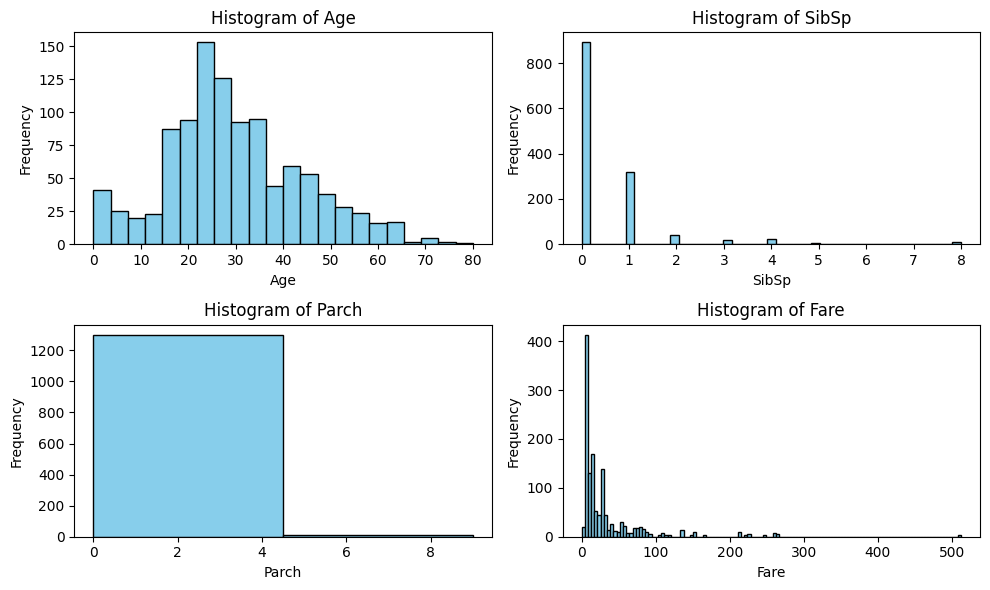

In [16]:
numerical_cols = [
    "Age", "SibSp", "Parch", "Fare", "Survived"]

fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, ax, col in zip(range(4), axes.flat, numerical_cols):
    bins = calculate_bins(df[col].dropna())

    ax.hist(df[col], bins=bins, edgecolor='black', color='skyblue')
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of {col}")

plt.tight_layout()
plt.show()

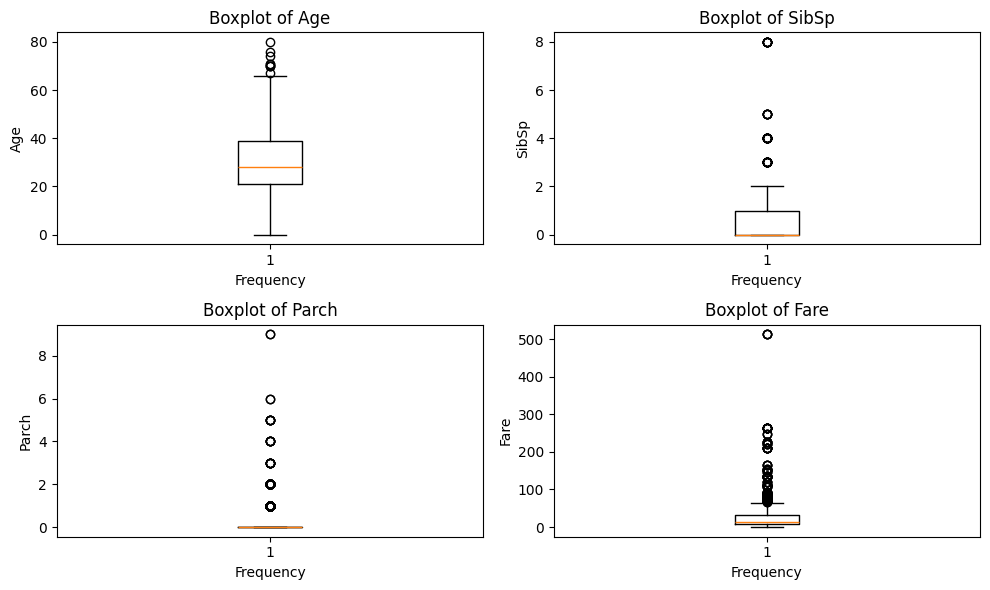

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

for i, ax, col in zip(range(4), axes.flat, numerical_cols):
    ax.boxplot(df[col].dropna())
    ax.set_xlabel("Frequency")
    ax.set_ylabel(col)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

## Bivariate Data Analysis
- For the numerical variables

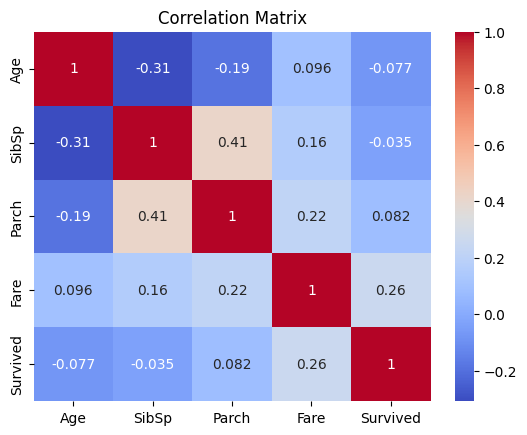

In [18]:
sns.heatmap(df_train[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

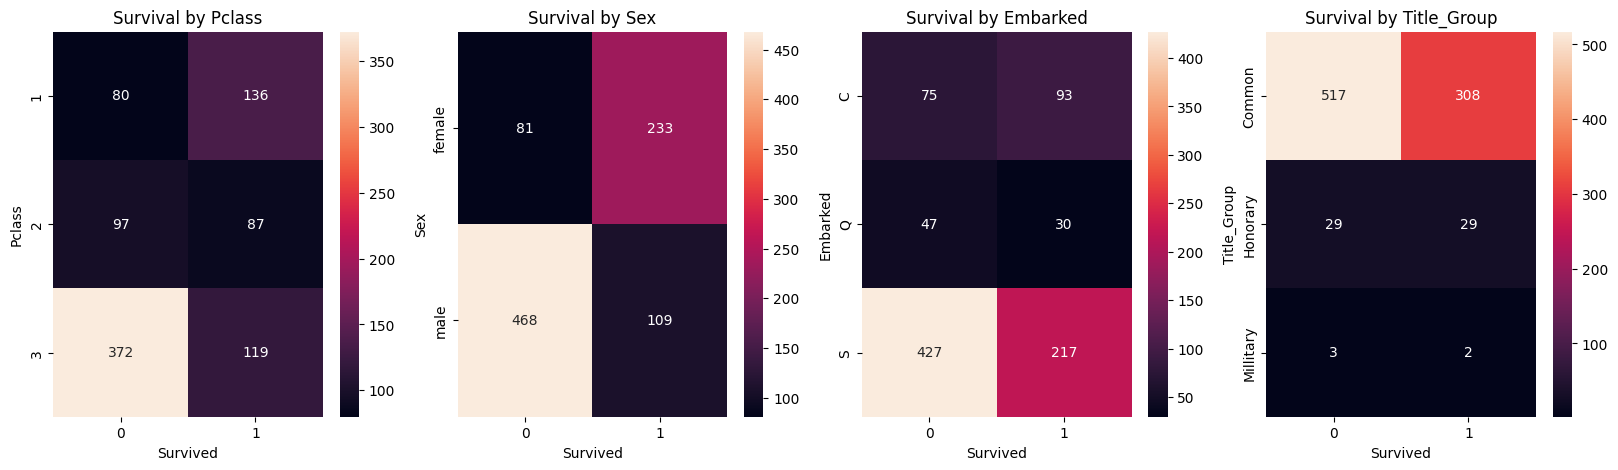

In [19]:
categorical_cols = ["Pclass", "Sex", "Embarked", "Title_Group"]

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

for col in categorical_cols:
    crosstab = pd.crosstab(df_train[col], df_train['Survived'])
    sns.heatmap(crosstab, annot=True, fmt='g', cmap='rocket', ax=axes[categorical_cols.index(col)])
    axes[categorical_cols.index(col)].set_title(f"Survival by {col}")

plt.show()

## Extra: Using sweetviz to compare the training and test DataFrames

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)



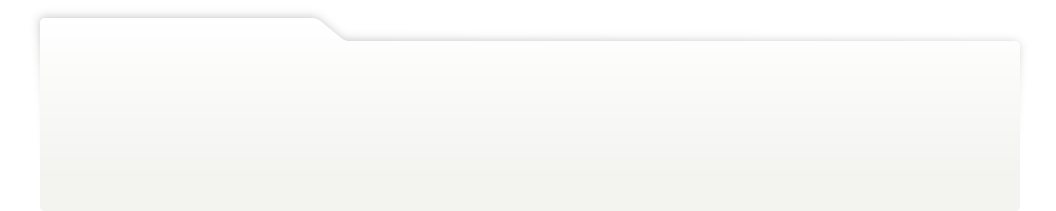
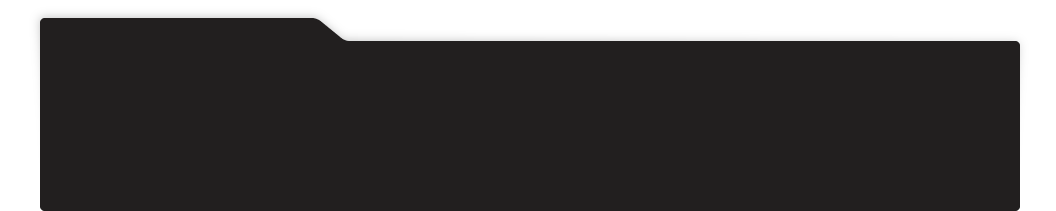
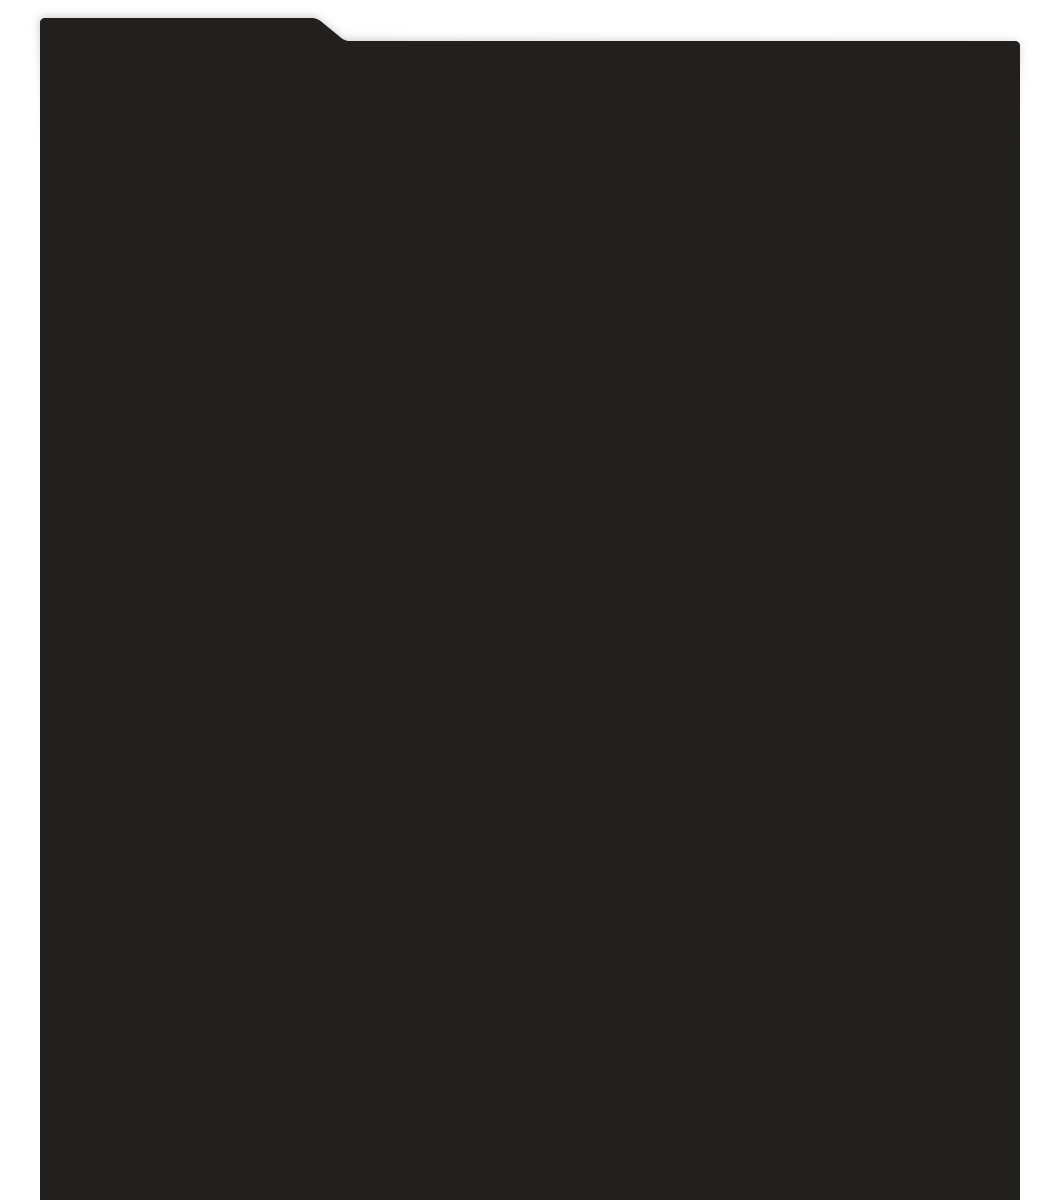
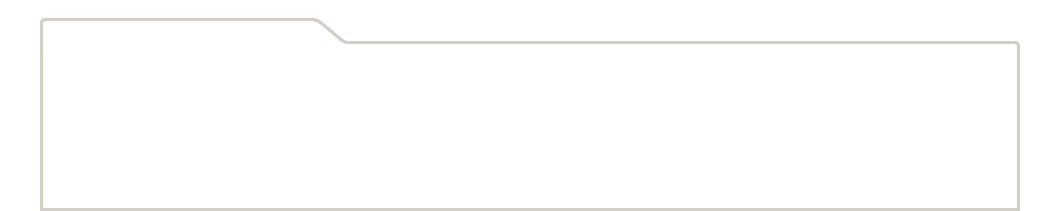
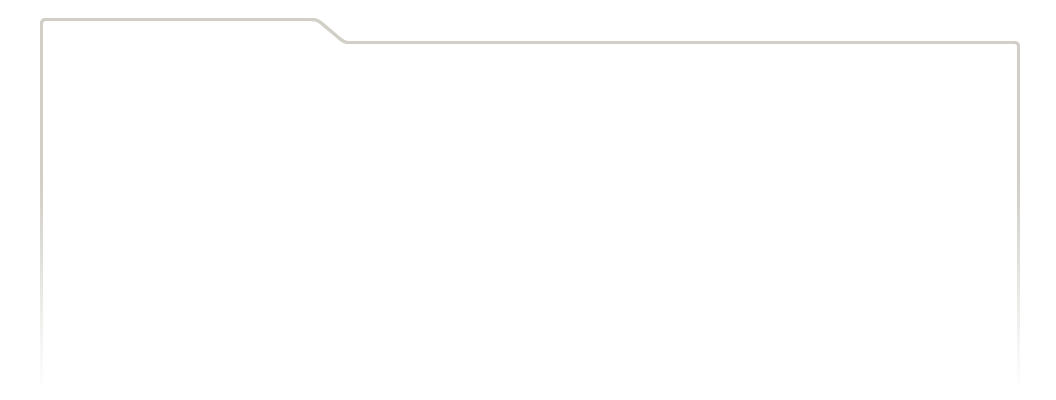
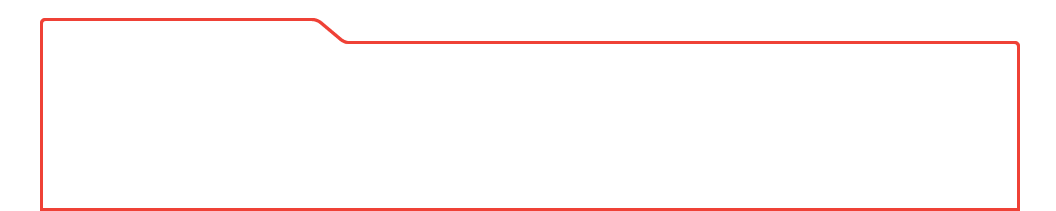
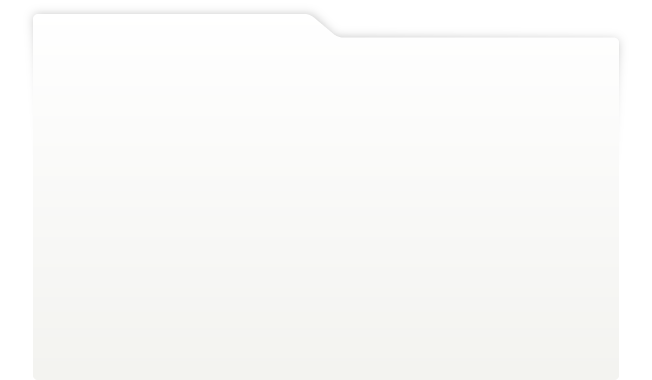
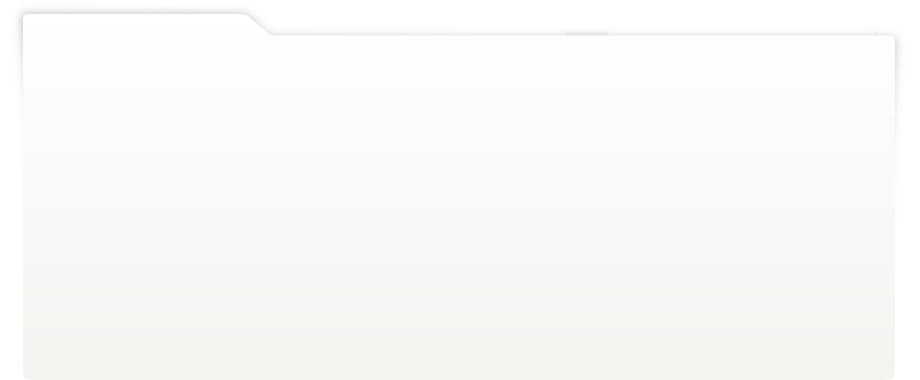
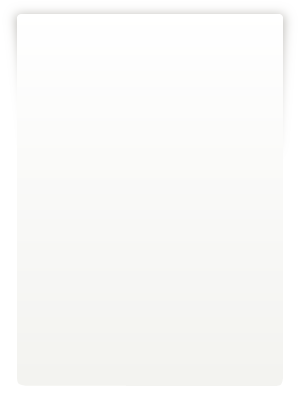
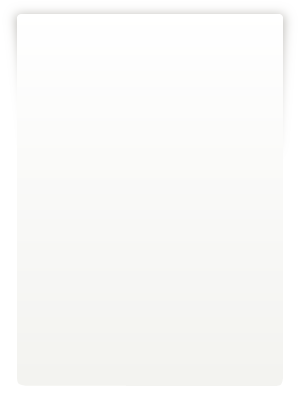
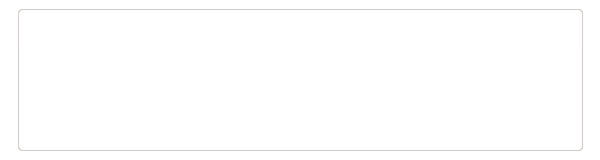
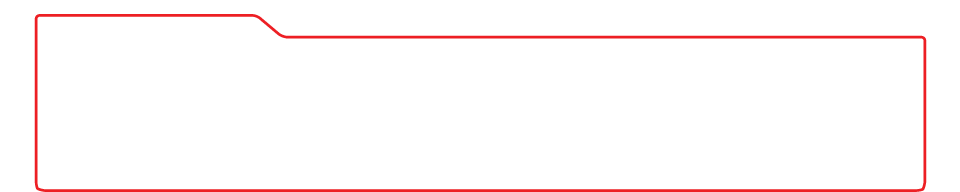
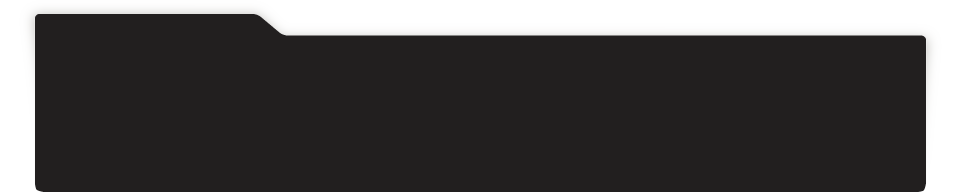
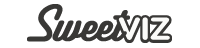
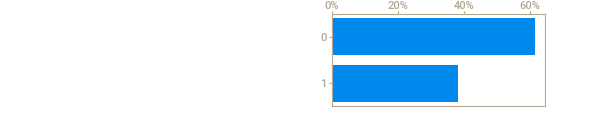
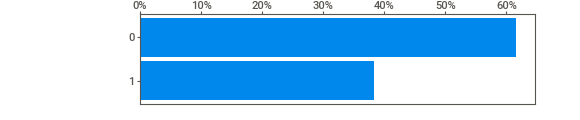
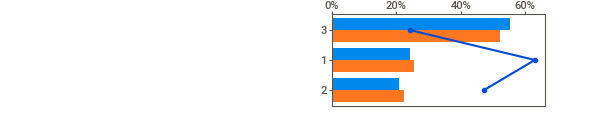
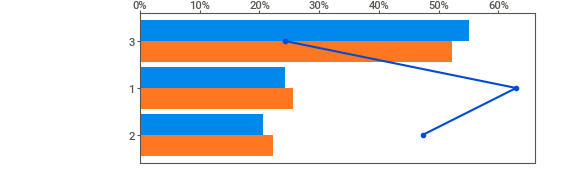
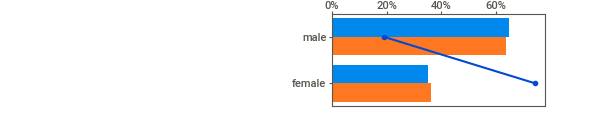
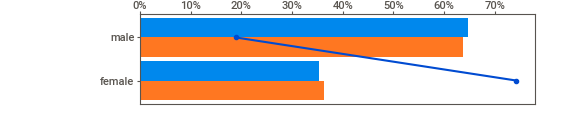
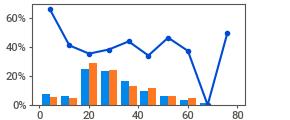
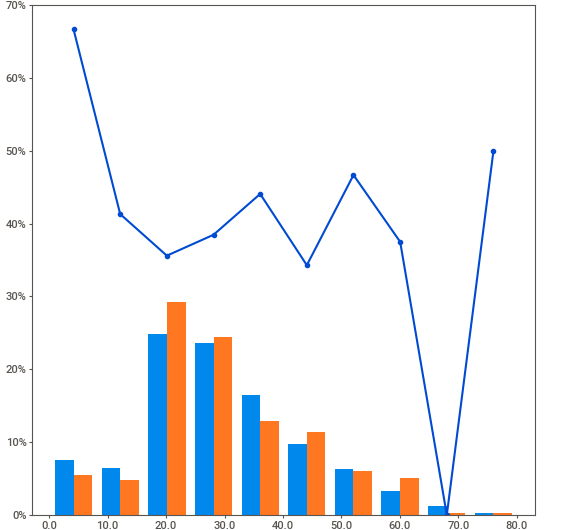
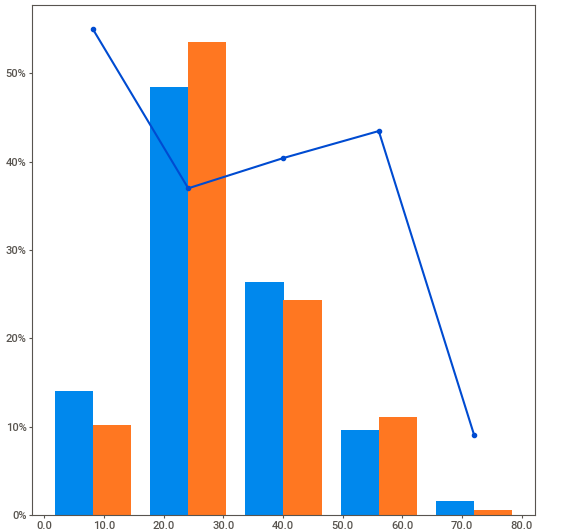
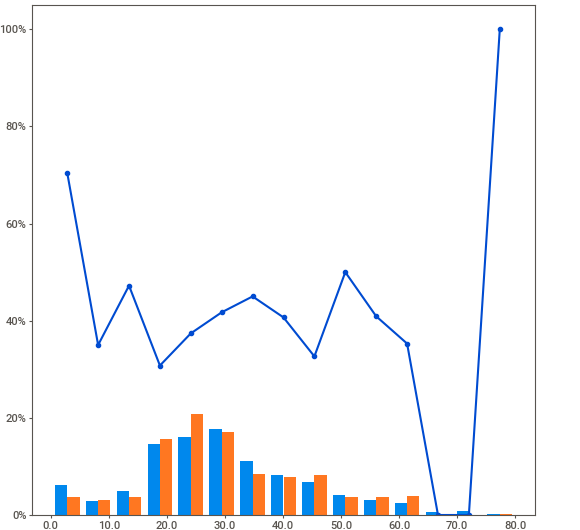
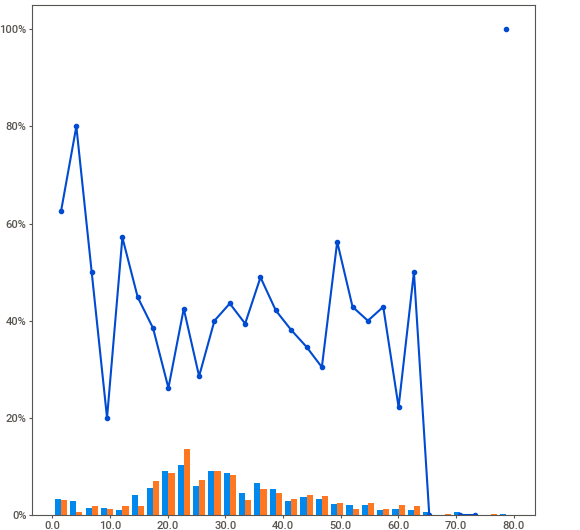
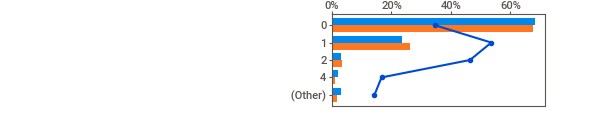
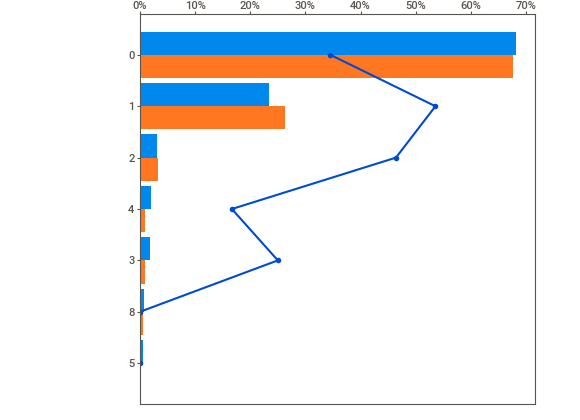
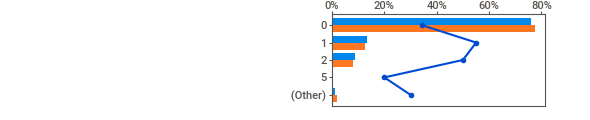
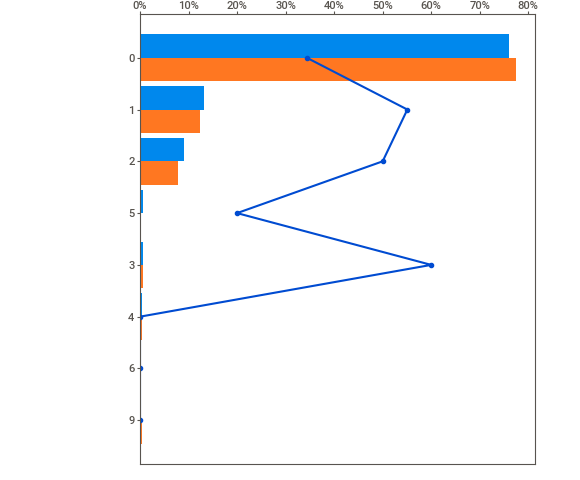
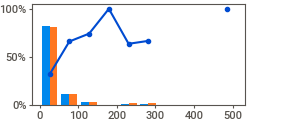
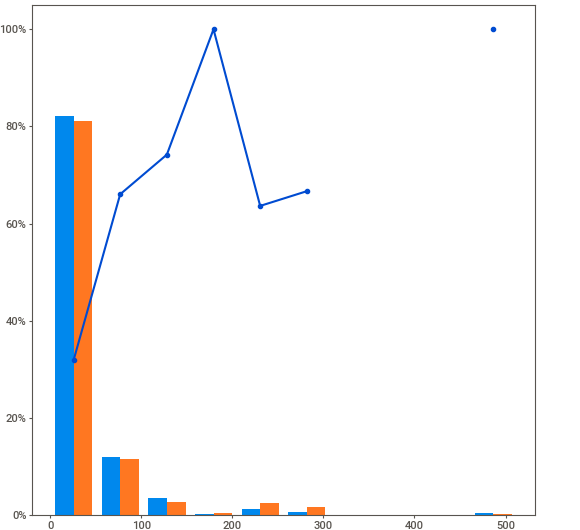
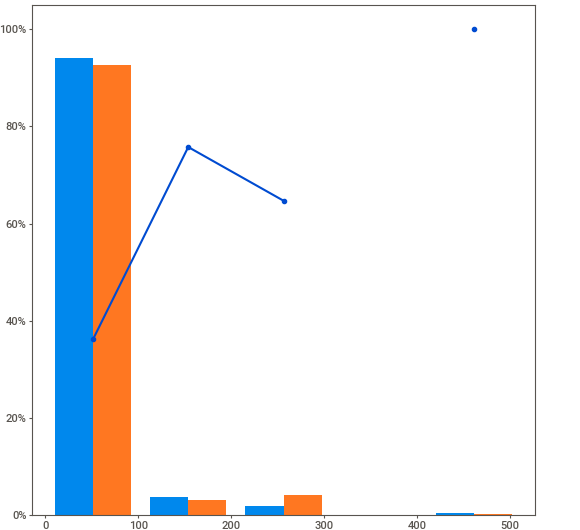
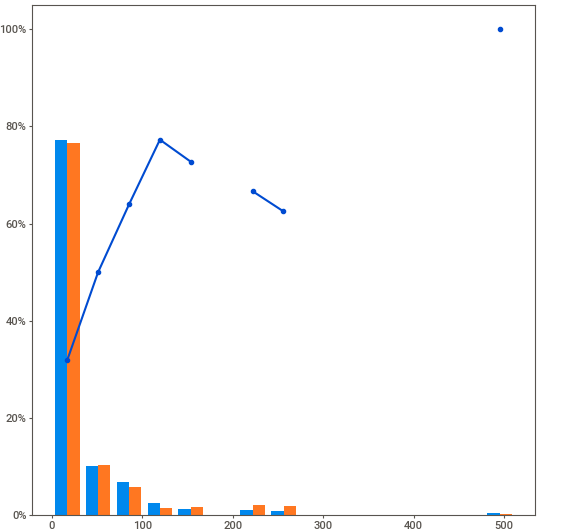
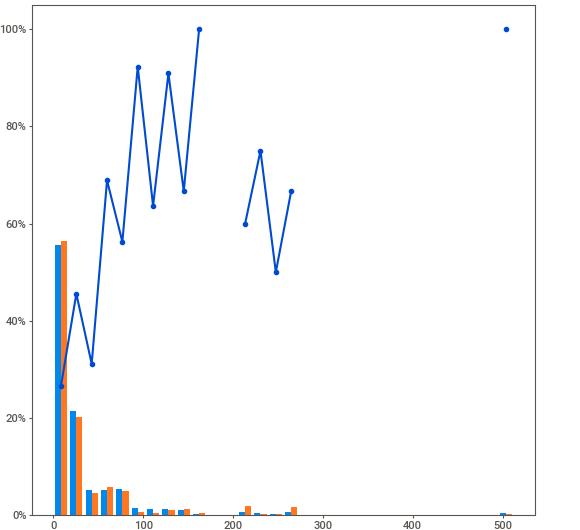
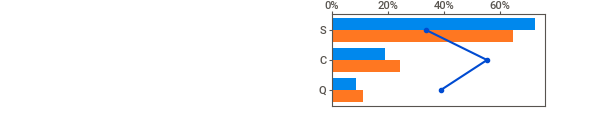
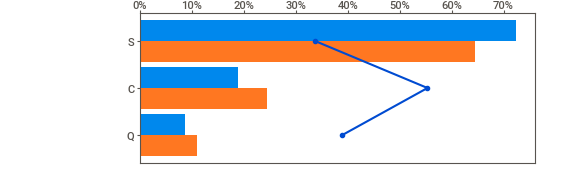
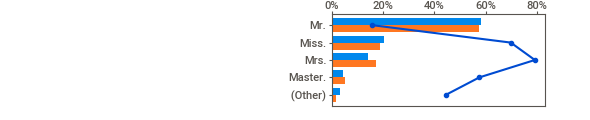
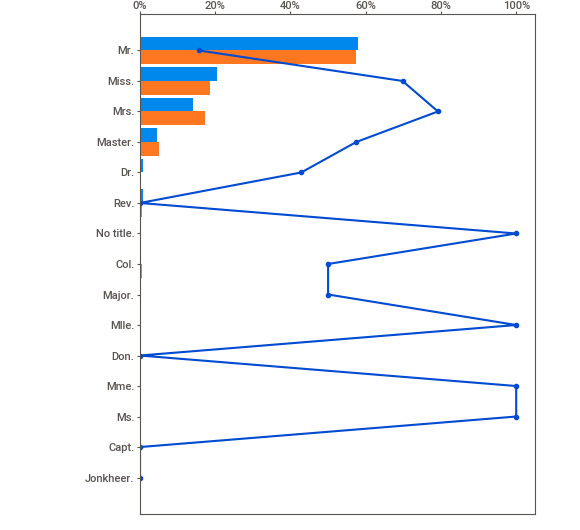
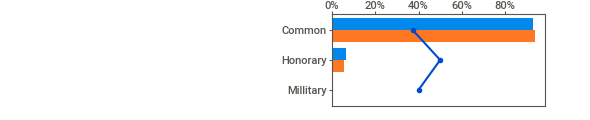
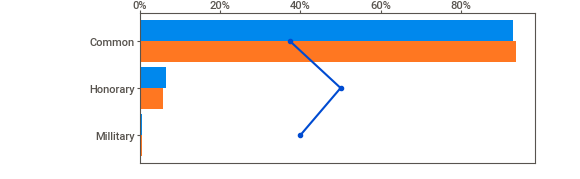
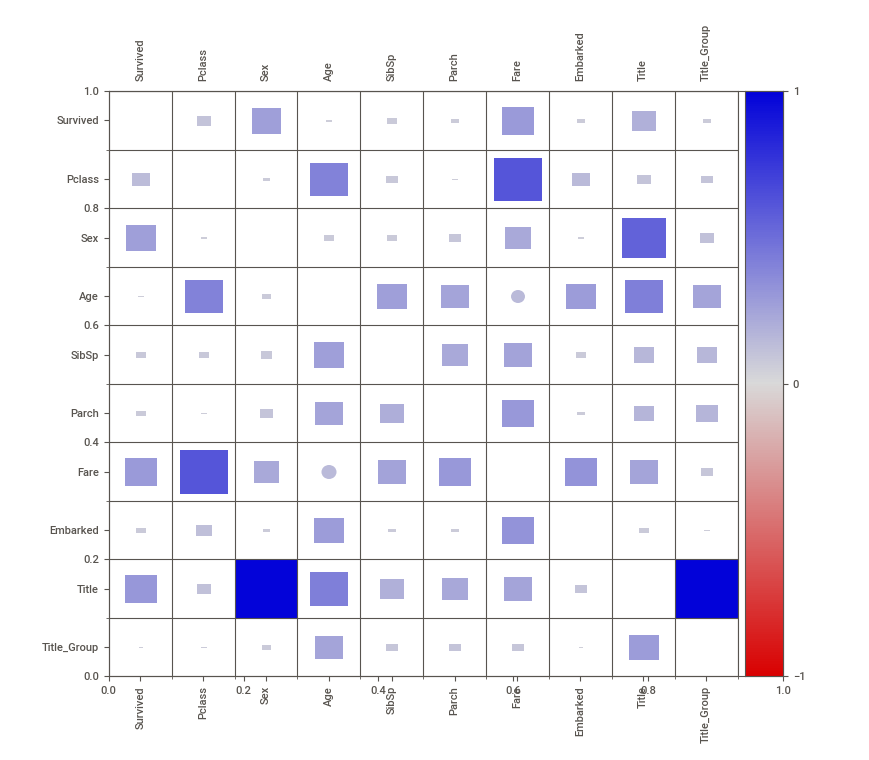
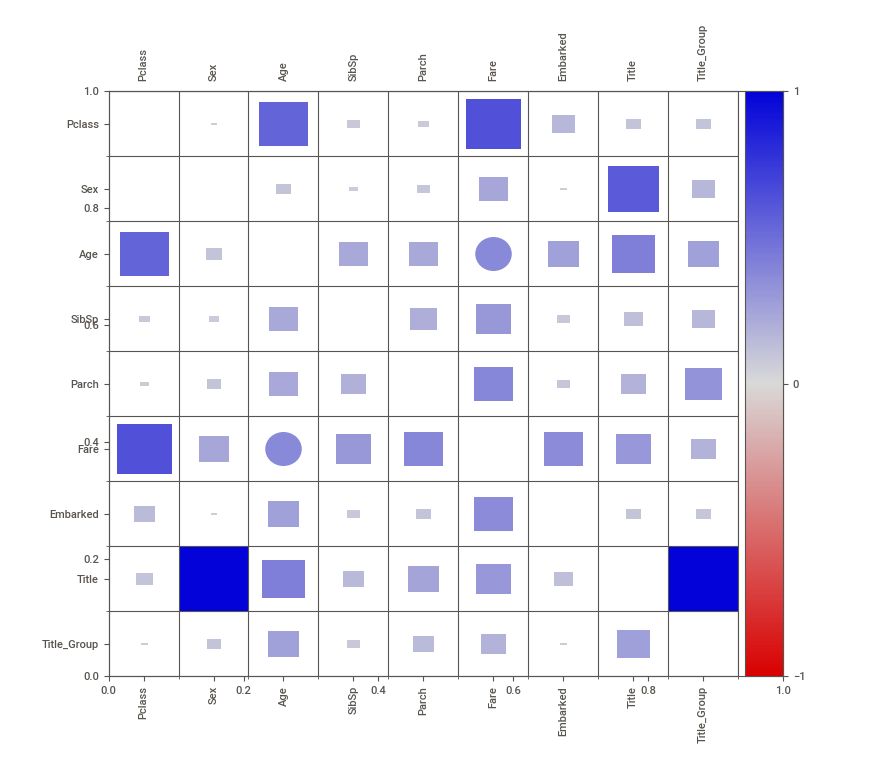

In [20]:
feature_config = sv.FeatureConfig(skip=("PassengerId", "Name", "Ticket", "Cabin"))
report = sv.compare((df_train, "Train"), (df_test, "Test"), "Survived", feature_config)
report.show_notebook()